In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("behavioural_segment_data.csv")

In [4]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [5]:
df.shape

(99, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [7]:
df.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [8]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [14]:
# Renaming columns

df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.rename(columns={'Marrital Status':'Status'},inplace=True)
df.rename(columns={'No of Dependents':'Dependents'},inplace=True)


df.head()

,Age,Profession,Status,Education,Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


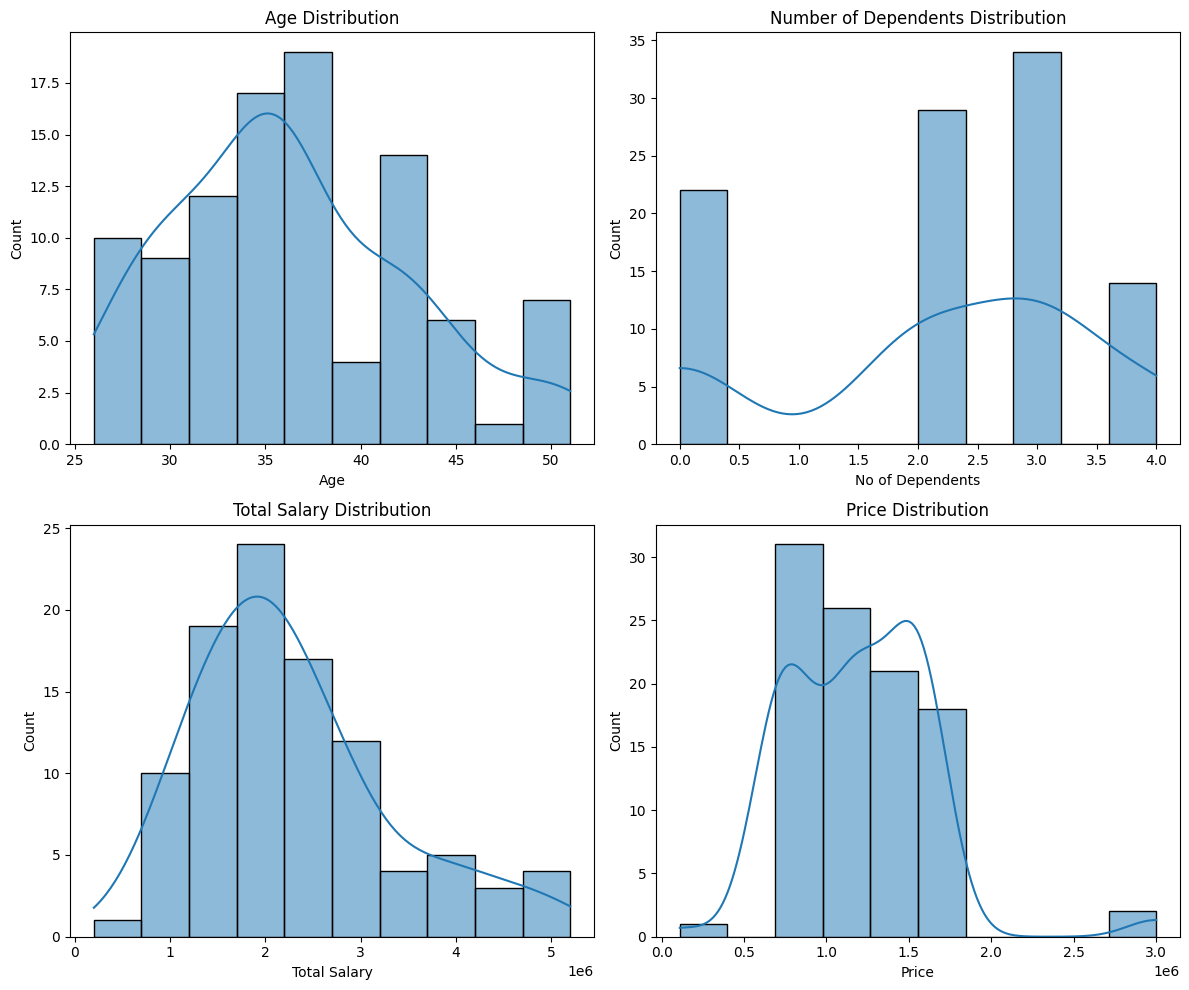

In [9]:
# Visualizing the distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(df['No of Dependents'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Number of Dependents Distribution')

sns.histplot(df['Total Salary'], bins=10, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Total Salary Distribution')

sns.histplot(df['Price'], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution')

plt.tight_layout()
plt.show()

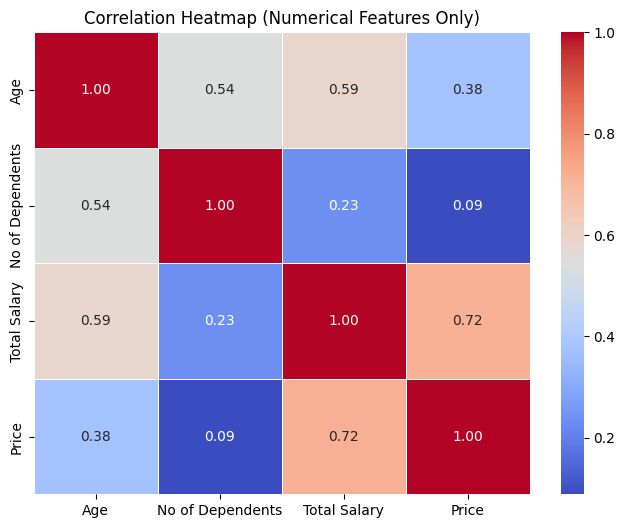

In [12]:
# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Generating the correlation matrix
corr_matrix = numeric_df.corr()

# Visualizing the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


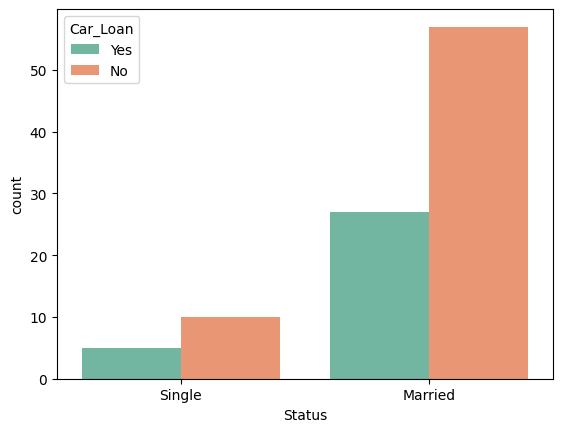

In [15]:
# Plotting the Car loan status with respect to Marital Status
sns.countplot(x ='Status', hue = 'Car_Loan',  data = df, palette = 'Set2')
plt.show()

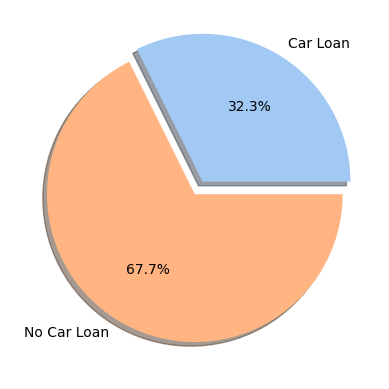

In [16]:
#Getting labels and data
labels = ['Car Loan','No Car Loan']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')
  
# displaying chart
plt.show()

In [18]:
# Selecting relevant numerical columns for clustering
features = ['Age', 'Dependents', 'Total Salary', 'EV_Price']
X = df[features]



In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


ModuleNotFoundError: No module named 'ace_tools'

In [21]:
# Standardizing the data for clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Finding optimal number of clusters using the elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

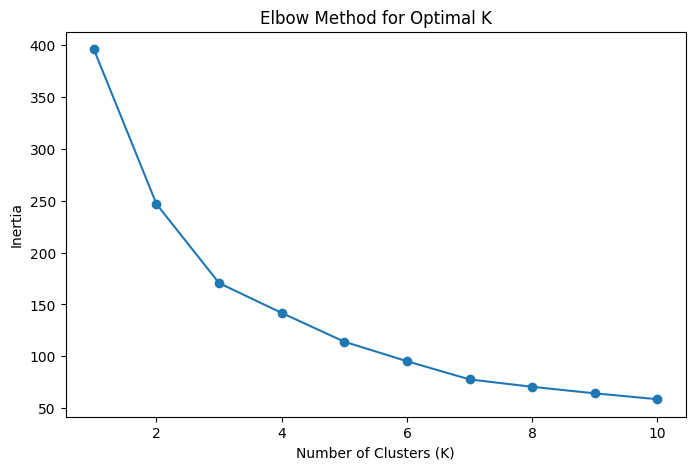

In [23]:
# Plot the elbow method

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [24]:
# Based on the elbow method, choosing an optimal K (likely around 3)
optimal_k = 3  

# Applying K-Means clustering

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [25]:
# Reducing dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

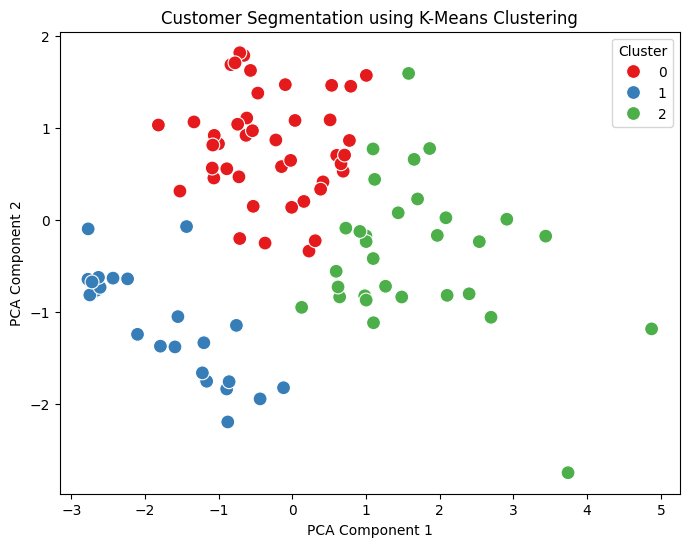

In [38]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df_pca['Cluster'], palette="Set1", s=100)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation using K-Means Clustering")
plt.legend(title="Cluster")
plt.show()

In [30]:
# Analyzing cluster characteristics
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Dependents': ['mean', 'min', 'max'],
    'Total Salary': ['mean', 'min', 'max'],
    'EV_Price': ['mean', 'min', 'max'],
    'Profession': lambda x: x.mode()[0],  # Most common profession
    'Status': lambda x: x.mode()[0],  # Most common marital status
    'Education': lambda x: x.mode()[0],  # Most common education level
    'Car_Loan': lambda x: x.mode()[0],  # Most common loan status
}).reset_index()

In [36]:
# Display cluster summary
cluster_summary

Cluster        Age         Dependents          Total Salary           \
                mean min max       mean min max          mean      min   
0       0  36.250000  28  46   2.954545   2   4  1.838636e+06   200000   
1       1  29.434783  26  36   0.086957   0   2  1.495652e+06   800000   
2       2  41.343750  31  51   2.625000   2   4  3.421875e+06  2000000   

                EV_Price                   Profession   Status      Education  \
       max          mean      min      max   <lambda> <lambda>       <lambda>   
0  2800000  9.590909e+05   700000  1600000   Salaried  Married       Graduate   
1  2500000  1.083043e+06   110000  1600000   Salaried   Single  Post Graduate   
2  5200000  1.596875e+06  1100000  3000000   Salaried  Married  Post Graduate   

  Car_Loan  
  <lambda>  
0       No  
1       No  
2       No